In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [61]:
volume = 0.5     # range [0.0, 1.0]
fs = 44100       # sampling rate, Hz, must be integer
duration = 1.0   # in seconds, may be float
f = 440.0        # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
x = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
myarray = x

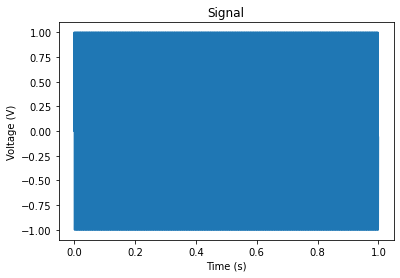

In [62]:
t = np.linspace(0, 1, fs)
plt.plot(t, x)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()
#print(x.size,'***',t.size)

In [63]:
#sd.wait()
sd.play(myarray, fs)
#sd.stop()
# sd.default.samplerate = fs

In [64]:
duration = 5  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)

In [65]:
sd.default.samplerate = fs
sd.default.channels = 2

In [66]:
myrecording = sd.rec(int(duration * fs))
sd.wait()

In [67]:
myrecording = sd.rec(int(duration * fs), dtype='float64')

In [68]:
t2 = np.linspace(0, duration, duration*fs)
print(duration, np.shape(t2), np.shape(myrecording))

5 (220500,) (220500, 2)


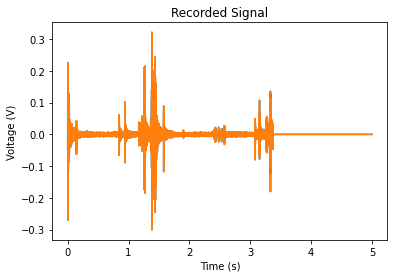

In [69]:
plt.plot(t2, myrecording)
plt.title('Recorded Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

In [70]:
sd.play(myrecording, fs)
sd.wait()

In [71]:
myrecording = sd.rec(int(duration * fs), dtype='float32')

Simultaneous Playback and Recording
To play back an array and record at the same time, you can use playrec():

In [72]:
myrecording = sd.playrec(myarray, fs, channels=2)

The number of output channels is obtained from myarray, but the number of input channels still has to be specified.

Again, default values can be used:

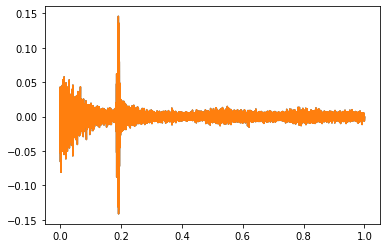

In [73]:
plt.plot(t, myrecording)
plt.show()

In [74]:
sd.play(myrecording, fs)
sd.wait()

In [50]:
#sd.default.samplerate = fs
#sd.default.channels = 2
#myrecording = sd.playrec(myarray)

In [75]:
print(sd.default.device)

[1, 4]


In [76]:
audioDevices = sd.query_devices(device=None, kind=None)  # kind = 'input', 'output'

In [77]:
print(audioDevices, '\n\n', type(audioDevices))

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (2- Trust USB Microp, MME (2 in, 0 out)
   2 Focusrite USB (Focusrite USB Au, MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Focusrite USB (Focusrite USB Au, MME (0 in, 2 out)
   5 Realtek Digital Output (Realtek, MME (0 in, 2 out)
   6 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   7 Microphone (2- Trust USB Microphone), Windows DirectSound (2 in, 0 out)
   8 Focusrite USB (Focusrite USB Audio), Windows DirectSound (2 in, 0 out)
   9 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  10 Focusrite USB (Focusrite USB Audio), Windows DirectSound (0 in, 2 out)
  11 Realtek Digital Output (Realtek High Definition Audio), Windows DirectSound (0 in, 2 out)
  12 Focusrite USB ASIO, ASIO (6 in, 6 out)
  13 Focusrite USB (Focusrite USB Audio), Windows WASAPI (0 in, 2 out)
  14 Realtek Digital Output (Realtek High Definition Audio), Windows WASAPI (0 in, 2 out)
  15 F

In [78]:
sd.query_hostapis(index=None)

({'name': 'MME',
  'devices': [0, 1, 2, 3, 4, 5],
  'default_input_device': 1,
  'default_output_device': 4},
 {'name': 'Windows DirectSound',
  'devices': [6, 7, 8, 9, 10, 11],
  'default_input_device': 6,
  'default_output_device': 9},
 {'name': 'ASIO',
  'devices': [12],
  'default_input_device': 12,
  'default_output_device': 12},
 {'name': 'Windows WASAPI',
  'devices': [13, 14, 15, 16],
  'default_input_device': 16,
  'default_output_device': 13},
 {'name': 'Windows WDM-KS',
  'devices': [17, 18, 19, 20, 21, 22, 23, 24],
  'default_input_device': 17,
  'default_output_device': 24})

In [79]:
sd.query_devices(kind='input')

{'name': 'Microphone (2- Trust USB Microp',
 'hostapi': 0,
 'max_input_channels': 2,
 'max_output_channels': 0,
 'default_low_input_latency': 0.09,
 'default_low_output_latency': 0.09,
 'default_high_input_latency': 0.18,
 'default_high_output_latency': 0.18,
 'default_samplerate': 44100.0}

In [56]:
sd.query_devices(kind='output')

{'name': 'Focusrite USB (Focusrite USB Au',
 'hostapi': 0,
 'max_input_channels': 0,
 'max_output_channels': 2,
 'default_low_input_latency': 0.09,
 'default_low_output_latency': 0.09,
 'default_high_input_latency': 0.18,
 'default_high_output_latency': 0.18,
 'default_samplerate': 44100.0}

In [80]:
#sounddevice.check_input_settings(device=None, channels=None, dtype=None, extra_settings=None, samplerate=None)

In [81]:
#sounddevice.check_output_settings(device=None, channels=None, dtype=None, extra_settings=None, samplerate=None)

In [86]:
np.shape(myrecording[:,1])

(44100,)

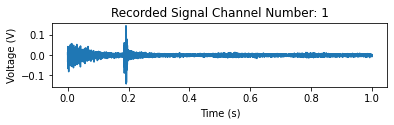

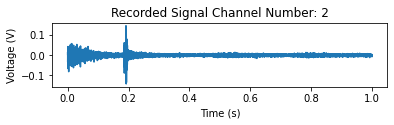

In [96]:
for i in range(myrecording.shape[1]):
    plt.subplot(3,1,i+1)
    plt.plot(t, myrecording[:,i]) 
    plt.title('Recorded Signal Channel Number: {channelNo}'.format(channelNo = i+1))
    plt.ylabel('Voltage (V)')
    plt.xlabel('Time (s)')
    plt.show()
    

(1)  print("First number is {} and second number is {}".format(first, second))

(1b) print("First number is {first} and number is {second}".format(first=first, second=second)) 

(2) print('First number is', first, 'second number is', second) 

(3) print('First number %d and second number is %d' % (first, second))

(4) print('First number is ' + str(first) + ' second number is' + str(second))


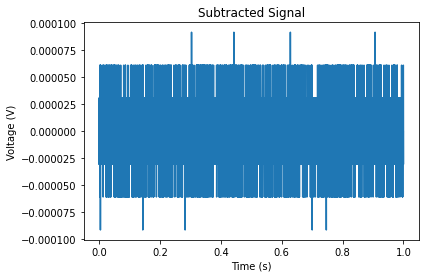

In [103]:
recordingSub = np.subtract(myrecording[:,0],myrecording[:,1])
plt.plot(t, recordingSub) 
plt.title('Subtracted Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

In [104]:
sd.play(recordingSub, fs)
sd.wait()